In [8]:
import os
import pandas as pd
import numpy as np
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel
import joblib
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score


In [16]:
final_data=pd.read_csv('data.csv',index_col=0)

In [17]:
final_data

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,1,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,...,1,1,2,0,0,0,1,2,0,Normal
1,2,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,...,1,1,2,0,0,0,1,2,0,Normal
2,3,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,...,1,1,3,0,0,0,1,3,0,Normal
3,4,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,...,2,1,3,0,0,0,2,3,0,Normal
4,5,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,...,2,1,3,0,0,0,2,3,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77277,65848,0.000012,2,0,1510,0,83333.330390,254,0,5.033333e+08,...,1,1,1,0,0,0,1,5,0,Pulse Attack
77278,65849,20.542910,4,0,1216,0,0.146036,254,0,3.551590e+02,...,1,1,1,0,0,0,1,6,0,Pulse Attack
77279,65850,20.542910,4,0,1216,0,0.146036,254,0,3.551590e+02,...,1,1,1,0,0,0,1,6,0,Pulse Attack
77280,65851,0.627022,10,6,590,268,23.922605,254,252,6.774882e+03,...,1,1,1,0,0,0,1,5,0,Pulse Attack


In [18]:
X = final_data.iloc[:,:-1].values
y = final_data['attack_cat'].values


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.6)

0.9392710804399396
train score - 1.0
test score - 0.9392710804399396


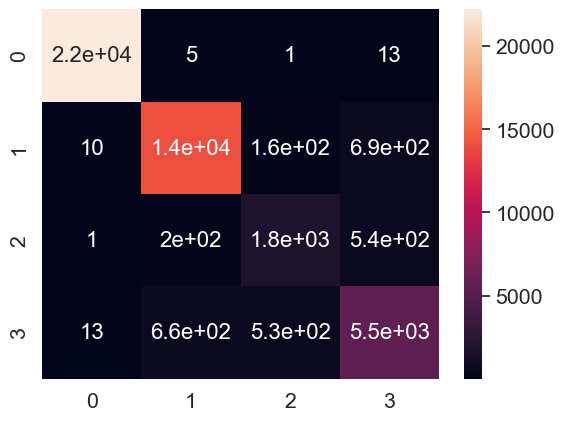

                     precision    recall  f1-score   support

             Normal       1.00      1.00      1.00     22234
       Pulse Attack       0.94      0.94      0.94     14912
     Scaling Attack       0.72      0.71      0.71      2513
Smooth Curve Attack       0.82      0.82      0.82      6711

           accuracy                           0.94     46370
          macro avg       0.87      0.87      0.87     46370
       weighted avg       0.94      0.94      0.94     46370



In [20]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
score_dtc = accuracy_score(y_pred_dtc,y_test)
print(score_dtc)
print("train score - " + str(dtc.score(X_train, y_train)))
print("test score - " + str(dtc.score(X_test, y_test)))
cm_dtc = confusion_matrix(y_test,y_pred_dtc)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_dtc, annot=True, annot_kws={"size": 16}) # font size

plt.show()
print(classification_report(y_test, y_pred_dtc))

0.749708863489325
train score - 0.8138263457556936
test score - 0.749708863489325


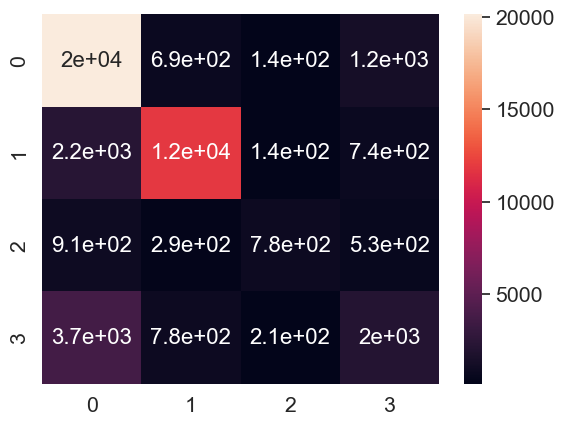

                     precision    recall  f1-score   support

             Normal       0.75      0.91      0.82     22234
       Pulse Attack       0.87      0.79      0.83     14912
     Scaling Attack       0.62      0.31      0.41      2513
Smooth Curve Attack       0.45      0.30      0.36      6711

           accuracy                           0.75     46370
          macro avg       0.67      0.58      0.61     46370
       weighted avg       0.74      0.75      0.73     46370



In [21]:
knn= KNeighborsClassifier(n_neighbors=5 , metric='minkowski',p=2  )
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test) 
score_knn = accuracy_score(y_pred_knn,y_test)
print(score_knn)
print("train score - " + str(knn.score(X_train, y_train)))
print("test score - " + str(knn.score(X_test, y_test)))

   
cm_knn = confusion_matrix(y_test,y_pred_knn)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_knn, annot=True, annot_kws={"size": 16}) # font size

plt.show()
print(classification_report(y_test, y_pred_knn))



0.9444684062971749
train score - 0.999708850931677
test score - 0.9444684062971749


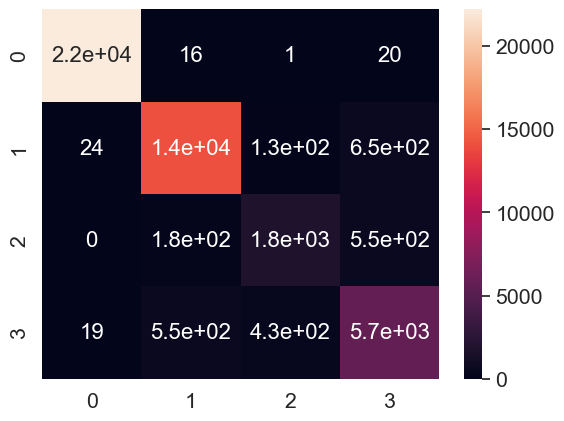

                     precision    recall  f1-score   support

             Normal       1.00      1.00      1.00     22234
       Pulse Attack       0.95      0.95      0.95     14912
     Scaling Attack       0.76      0.71      0.73      2513
Smooth Curve Attack       0.82      0.85      0.84      6711

           accuracy                           0.94     46370
          macro avg       0.88      0.88      0.88     46370
       weighted avg       0.94      0.94      0.94     46370



In [22]:
rfc = RandomForestClassifier(n_estimators=50 , criterion='entropy',random_state=0)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test) 
score_rfc = accuracy_score(y_pred_rfc,y_test)
print(score_rfc)
print("train score - " + str(rfc.score(X_train, y_train)))
print("test score - " + str(rfc.score(X_test, y_test)))

cm = confusion_matrix(y_test,y_pred_rfc)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()
print(classification_report(y_test, y_pred_rfc))

0.06760836747897347
train score - 0.06677018633540373
test score - 0.06760836747897347


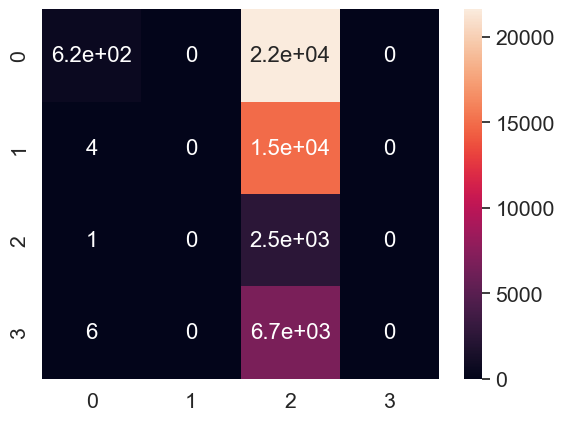

                     precision    recall  f1-score   support

             Normal       0.98      0.03      0.05     22234
       Pulse Attack       0.00      0.00      0.00     14912
     Scaling Attack       0.05      1.00      0.10      2513
Smooth Curve Attack       0.00      0.00      0.00      6711

           accuracy                           0.07     46370
          macro avg       0.26      0.26      0.04     46370
       weighted avg       0.47      0.07      0.03     46370



In [23]:
mlp=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test) 
score_mlp = accuracy_score(y_pred_mlp,y_test)
print(score_mlp)
print("train score - " + str(mlp.score(X_train, y_train)))
print("test score - " + str(mlp.score(X_test, y_test)))

cm = confusion_matrix(y_test,y_pred_mlp)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()
print(classification_report(y_test, y_pred_mlp))

0.8524477032564158
train score - 0.8526138716356108
test score - 0.8524477032564158


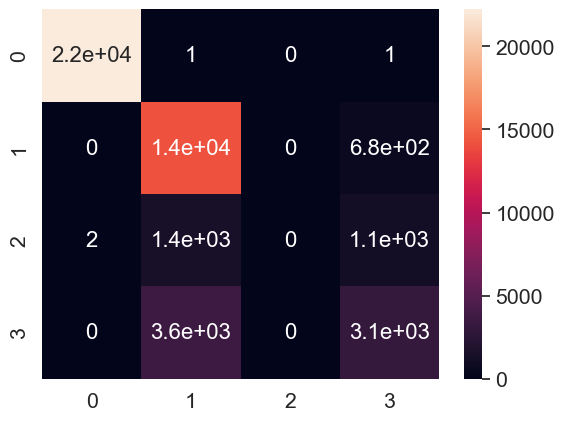

                     precision    recall  f1-score   support

             Normal       1.00      1.00      1.00     22234
       Pulse Attack       0.74      0.95      0.83     14912
     Scaling Attack       0.00      0.00      0.00      2513
Smooth Curve Attack       0.64      0.46      0.53      6711

           accuracy                           0.85     46370
          macro avg       0.59      0.60      0.59     46370
       weighted avg       0.81      0.85      0.82     46370



In [24]:
ADB=AdaBoostClassifier(n_estimators=100)
ADB.fit(X_train,y_train)
y_pred_ADB = ADB.predict(X_test) 
score_ADB = accuracy_score(y_pred_ADB,y_test)
print(score_ADB)
print("train score - " + str(ADB.score(X_train, y_train)))
print("test score - " + str(ADB.score(X_test, y_test)))

cm = confusion_matrix(y_test,y_pred_ADB)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()
print(classification_report(y_test, y_pred_ADB))

0.9496226008194953
train score - 0.9509899068322981
test score - 0.9496226008194953


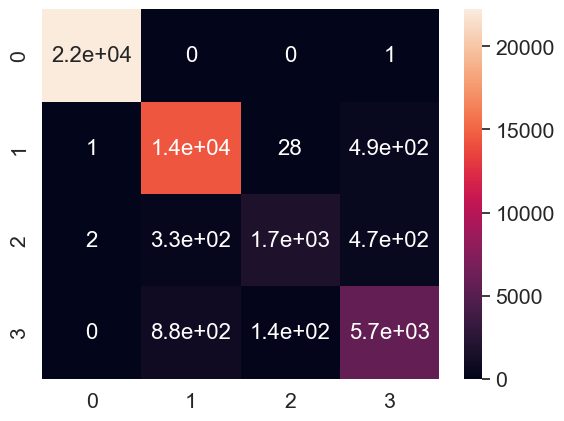

                     precision    recall  f1-score   support

             Normal       1.00      1.00      1.00     22234
       Pulse Attack       0.92      0.97      0.94     14912
     Scaling Attack       0.91      0.68      0.78      2513
Smooth Curve Attack       0.86      0.85      0.85      6711

           accuracy                           0.95     46370
          macro avg       0.92      0.87      0.89     46370
       weighted avg       0.95      0.95      0.95     46370



In [25]:
GBC=GradientBoostingClassifier(n_estimators=50)
GBC.fit(X_train,y_train)
y_pred_GBC = GBC.predict(X_test) 
score_GBC = accuracy_score(y_pred_GBC,y_test)
print(score_GBC)
print("train score - " + str(GBC.score(X_train, y_train)))
print("test score - " + str(GBC.score(X_test, y_test)))

cm = confusion_matrix(y_test,y_pred_GBC)

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()
print(classification_report(y_test, y_pred_GBC))

In [28]:
joblib.dump(GBC,'BEST_Model.pkl')

['BEST_Model.pkl']

In [30]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from collections import Counter
import unicodedata
#import plotly.plotly as py
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd
from random import randint
import threading
import pandas as pd
import os
import base64
import joblib
from tkinter import filedialog
from tkinter import *
import Prediction

app = dash.Dash()
im1='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAABOFBMVEX///8Aru8AZrMAm98Adr8Amd4ArO4AZLIAq+4AmN4At/8Ae8+jtr+Nt8f4+Pj5+vgcwfwAfMaIudzs7/Be0PkAfcu109+oxNsAcrwAcL3Z6fQAfs6Fq8YvktEsl9a4ydFros6Oxeee3voAX7Busd+11uu3y9t2rdZMk8Ght8oYgsfDycwAn+nR7fmQs9EAouWgwuC26vwYtvOnz+jm7fJUtd1+z/E2reVxuuPF4ewAWqwAZr0ld7zk9fwAa71Rkc2MyOEXjdjY3d5EtOlSoMNyt91zmsYEw/5RxPaBp88GbLGOv+bE5fIqdbJAjMtGhbyR3/6C2f1buepCyfif2++y0t16xuRqrMhQxvBZptrM3eMspNeB1/Gf0eMGZqNEtvEimcuZv8220+y57vxckLmesr2N5PmMqcXZBlbUAAAVRUlEQVR4nO1dC1faStfmYm72OxM0XiCtLZcDVosNxghS5VJoK1bUivYCPb596+l7zv//B19mJgnJzASCUgEXz1nrLBtCmCd7z549e/bsCYXmmGOOOeaYY4455phjjjnmmGOOiaFSUSbdhN+ISrqp8bxY+rYDJt2U34PdphjGEFd2Jt2Y3wD5L50PO4jdTLo9Ywe4FF0Ew2K4POkWjRnyrluCkGKrMuk2jReVb2Ev+HBRnnSjxoobPUyiZEy6USOht86C6ny+IpIEeb09wfaODLC8EKextG5/rlzxlAzDXybZ4lEBlpcWaAxhuD/JFo8KNsPtR8cwnvBitc/w+FEwTHRTBFyWhmaoX0+wwSMDMXzyfyHZi/4Nf9CjhT5TvqnN0Bc7x9Rw8W2mplFDGYJ62KunvD5bjulQhqEKMeaL6Qdr3FgwnGGocuWaXPDiVHmlwDAqxuDgQwCGocqlLtr8YunpISiX9w5K30109gZ0nCAMQ2B3JbZoQm8Vp8iMZjsaF41y5n9RSetk/W4LxNAUY3nNRFmdHgEaB5JkcrPASfl9n2lrQIZTh3IJU5Mg8J8l9pRnRhkaYQ5JTmsVi8WWKHFQVXlmF5pNhmoJya20q8BuIyu7JQ3Ks8SiOJMMQREKMFrsxxoqKWh1ogeMcO5MMmxDib1Nu+mAet6kKObom2eS4X/zpgiLxMX35kWpSRv7WWTYMzVSKqnE1UrTFKzWo+6eRYZ/mNLSUlSXS0Pin+jbCzPHUO5IUa5Ej++9kunftJCPmnvpwsbCrDE0mqasOrS3DVom8x8N+Oc6GXyaQYZFxrhQz0c5HjPcfpwMYf/kH7UMi5Ijw7erSxbMP2aSoWVRPJD7/dDIuZCcOVsaOmDbUtW0pRLNXJ7V8ZCOFuHxkHJqZnHEL0MqTXKJT4E+TZ4OZ8wiw9B3U4j5A+LiNzhFbD0OvzSURYELT0wM3JjzDU5kRGtmkiEwbU2U09wjRhFOqKIMCzubDEOVDpzj55/vVcxJPlCMPTT/lZoNxr2zyTDU41EYQyt1UulU5zsmyAxizCrD0BqO1OB4Ivq/5JNeMIvjIYJyqeXd8VKt6BPbB8uricST/z1s64bBUHtldVhKC8gehCUYRuQkKc93dv2C1WA9aeLVuNt4Dyg/Dzol3uxhBz+HkFTK9ZYuiqK+Ui8PyJmUgYlxNW7t88+fa2QAZSRU3vN5KBkOSkZ8P+xZstJoNJQHWmsw6iVRy5vQvr+/axoquClF+50ryuU1X+V7cBj173nOahwX1Q7utk5c1NAzJGc1QtJSY27oXVFput+9+TdPhjOD4EBCy2WlH610utjkIVuO8j8ng3ZYwiZbEzUNyZKTRm9ZGi0F8gc7iqnkQNlJwWGdy0/Dqnq7BAVomuz6bns3nULy5KKjSlGFnomkr/X7cBYO61x48omCQEcE98sV2DhZrtRF2LJofbTHQDqS7hm3kf8pde6V7QnAvUcLeQWqqOaezDR0pLQjjRtt+FZKRFS+AqcMmu8K9kCAXu/FeuF1EuF1YT3X692RaJuPUlGFXhNq3EhdEUZfolSfq0fZ89phMLb+TZ4fJSJuHJ13N7fohY3hSEEy74mLcAGM00boQRUYk29S8SUcmxgpCQsY6q/theqhABERMDvzD4jMYWL7V84YJEvgBrqiwl7IUzemYQ8aYTDLwuALwzjtQSFa0yLAzLwjGlhevohXBSHiA0Goxs82c77vDJxu9rGM+lk2b7aBzhoGUIid4Gn9e1yfiRtrkCFW3s0/XfDpm1vJo4g/PZtlJP5yy4fgQXzJwcL2GrxWhHaGtikwPhvVRmBo3p5nSAYu2Us4D+s/CVce7NIefa+xdXGYIfkJWFuJa5nD7QLDRBt/xj2ZxD2byXfGzWtwTTa4NYUyzDP6h9qP4Z+5VyPiS6QUQe4iIZA8qtUFJI1qleQuJLb3yGaDLpErDRmCH2bTGGtdofKIDH1kWC71Ga66fz2+7aXYS8ZdFIRM5nD1vPvv1hYO7W+ZtnVj9TCTEdwca951fyzBeOKJjadQS9Fwz8qBGJWhTz/Mmv1Z2kV/nm07QBSfrvdvMzar/cYLQuKoW3jVIN47UF4Vukfu95CpJt1iVLoJKLi9Vw7gE+QWx9bSERkiW3rJYN63peWsg5ewKW/7EsjWIn1+1e0PBdXHWCrq7cl51fUuLm7dn26skqoRwmtazxkMfSyQH9B4WKLaBfMPOJG63NhIxF0Ebxf6qnf49l91oO8C1H833tgCF4T4uqtv9Dae0EZ6L2/6IvRlGeZlMVaIfAGjvLS3Xo+yh8nGy7dOcNRIOoqXSdTWA7gHINeNOxwPuy45GIxRqByGL5+63B5xxMd+KTmPqCDXaI1xu+q4X0at6ujnxW1A90e57Rte4XywqikwNYISYgUuYzJEOwA6pPjDO7doornFwFYbtb4Al5mzELYDZLxezdhfHEIRrttFyXhzCk4uRlFSe34YzjqdSN4Lo/nGwKzd3LalbkKkRgX1lZ3613dXx8etd/v1NuWNGl3bPGWOGOlirsegSZynHeALau1uEGJ9pOFUiRM7qC3AKB+gHOD8wP0r6pHdnRYoAfauWzF9cZE3sbiox5rFNiFMpbBtf/tooBR3UEv4rPMLO6htUmc0gqb5fYvjWE2YNdrUojhOM2jqZNQsTcus5oj7wE0s7N5IwYd1/ZIMkJWX7O+fD5xWpWB8ndM6P3um92+sXaL8XWk0HYWQkRSjMFaKotnmJDpcH0RQPbcaKNRIGbSvFqn9TLyorxCqqnatwTGzPUiKcgqFLaS8qOt6OI/yr6UR5hV9ZDt5d7w0+mN34FTONjKHH4jmydc6Y0caFOQ3QoxK8tC2qIMMGrgO53GbOBw05aJ3Ighj3no/5q0XBz5Efp2xRrQLsnFpm6DZB0UEh3CMGJCUi0NLipsDHYVyU5Lsxa6oJIW/3HnDt9K+bP0w0br8PGRsW7dGtGqSvPGT0wF1/eryn0+fVlp62NozIsaIHqckLUUVXg/8ObDb4rUoiuprPz6xFmMDA8DFiIYyLGykWoYwUyMJrlkS5PXO9Y6ioCe2i8eWHPkWodJK0tKFwWMGHHzSqQMTqfa9+AXGS9tEkKNEpYXFJR7/5XpNYGdl0RIjmTKmbFgUL4aGvMYQmwyMgtUqygaCor2LkFBH+XPMEi1Z+UI9x2/rcPN3tnhE2DqaWCc/KWMd1b/RLtyNRfGKlEJ2ScB6epdg4+8BOMEe15s/KZXZZ/c2hBurh5JClF+/wRqRnJryNDlsR4Vzquf00N5sPvY383v/oK4orpDGSe5adplSiUnhooqdUdr6/VxEHP5if89Au+8Z+2B72MEVtqdkSbaHp4QCPUgDtOWVP/az539hW0O58+AUP/JwOoQIfmXwC6d59GKop331+2rlCunpPuVNKNgFFKjRdSLILWAzU6A/wqM9NR44AF+QqWnSPG7x8BO/ZXzroSEvI0MqPGW8blQwiCedzz4ArglFpaean7zFxmYazKk17T1k+ZHI5xav/N1i6xUwAgfraDFO+HivdJnxoIAN6TZjeLYcGrqbOcBVoVgMDezZVE/G2NQ74gLbhBPWbsN7MJRP8Js7G2NT7wYDjfbCESuSB4r6nRna2l8dMsUgf1IxMd5RdOvQ36zfR4YhpYvM6eGz4G1R2ukDNKHaHec+dzydy5yyHnkvhqF1PMwmgzYW/LQmxVFzUvxlbJNGyyAcMh94P4YNNNtnmjAWss28FLXCNhwnie/HVMnuBeotwhKThIIZtnYUPwxiCDbQoxOBOqKcFnGesmTVPuDyHb/g9WgddR0N95ku/Unj8z8rMex3tlb80MLxm5VP6Rf0OzqBaipEGL4STbCI4rmm6FwBxiZjub9S3786Pr76ehM08Qlgh+aQSjXY2T9edGJqVoSNBSsgJYqLV1S8bKsa2K0poqCb1so2gCwrdpCYJ5+opGEQjOfFxVhzYGjU9ZVkhKlJlaswM0Q6AKK+Qjykh+b6wsXw111GYf2SkwogswP98opThYoP64wVYAaMC7Y1qC+OyA/+6CLxFLyQJZwNZSjraBnJrZRKMUqttxkr7sKhvLYSpDsaH1EjamQj3t2BYXjxD+9DwAchmGuKEqLIHfPooiev6xOpNUHKpKlxZGg+EDotx0bVUTZD1BETw1KcQdMcJqiMQvkHpOia1qjk2gIfpDRqLoHdY0LeMqt03sgMLdeUDuARgNmKUocyHG2iJzLKajor9kClAAYzHIsM5QJ+uj0vAwogga7DBeAoPcvG+bD9p9E/2K9vW36+QUCyjKfdht+ipRbDyGv7n0kSBZQlnIKLNBRBk7l5/a3Tsh1KhOZAbPfdtW2y4uiqxfA1DgSTg7I/Q7gG7PfZEIYg+WSVQBe6CWh74HMGQ3cmpekgshjaXXyNrBmwsHRXhrre0unSiMFkeJIgm4HWuZA2fmcwzHoYXjMYLtoMc2OSIR9uXfcavWsfisNkSDGMD2Y4ggzLz0lECYbBLI1uFXlci92JYfLJUwJDtNSTnVehGfIxZwyVKVgf3Fq2NJil+Wbftsb8fAjDUO8FiR62NHnT56YnEvKBx5aGaD9SJBMJGMiNwJDXnYQX8BdDZWiGWEOqrCieGzCHiKMzvmBynuTKD7skf5MPB9gfU0YMDwP5NHysP01+weqKlE9jjfjDJoiofgOdbPIJitCVhVchfRqRtRebhPExEthrE6/6DBusnsj2SyOJobsCYeYl955MXTEniZwn8/vaq6d8mL0iRjA8w543mV/ClmF/7hBIhjgDSfg4dG5RgcW4oimPuVPRJhOv7noOJRB1nxUxohF49rREKNKwfqjQPiKDIV7uDjB7QsmiXNRdUQ3touE0wv58cr3YWLA0OHCCjQExx2fbUociWGF8SjO0Fl5fDu8tMPkyGs23sshTBUAtoqgNR5KQ20VdR4VD9W9BC4cWcJxmOQjDsHiM9fSG/THJEIVihchygHDDDpwqRSWxk7re3U0f/EDJRBoj2RfABMl3X2/8ErNp5PDCU8075Pt5beI/6GOmjtIM/8SRqECrpGUeRZ84DYLDlSpZpY9GRw9lYQhVb7zUlyFasm/4zB4JhgoO0xy9CNSQSstKNLSTwfgR0039YC3WvvHOsAcz7LGdNpJhw1ovCBj3U66/i1amISfl+TtufmZgE0f1vXkmgxkyhwqKoXyKn5wM3BRj711YhJluvP5+UE2AEfECL4J503rHwdBeQPTZ9cWG0vv8+fPamA81wav43gnUEC0NxPAWBbmE+OTPYPmFV0g/uM3vYIavgvRDcIKfe/HAdBgox1FLnrjdGj+GfAva3Bs2QS/DMk6VS0xBMgZ23LwWwZchTA5iu2wkQ2zBgrhsvx/YrfEMif5xmuObMttlIxgaqwJ2aB6eD40eNnqZbt9AD4i1LS76SNDDUD5F6Yl0vupk8AwPGPF+T7x3vLR8RKv+BKHEsdnrOn3mvgytua9QnZYc2mcRIqByX4YFK2E/ORE6DFjmVHDiDfdk2FgVGI7SRFHAQnS2Itxv7cnakCAw86wmBCu7R4jYSbT7d2L4E30XnNrvaxrGQhu9iKWnp/jfdb+1iQGwI1UFy3BFRsv3+t04sTKhI3ii6DkOx5eS5x/8Ik4dsDphpPphknxogKS1XcnazGPUHfc6oDhbNygSkrMICrXp6YQY6oW9bcZSLnUtm8ZY8+I6bePafRl3ul4t4nlT04Scta9OeHqPpLmGlfwsZIJkQj00Ctb+PGF1764KlntqbUNNBPG4QaVcLu9UHlCbl606SUL89E6/KheW7L3ug/dXIii7X65iJlrpBzw0afONRTGyeYd9EuDULjuQoXZp0misoAw1uJ04RlfV/m1IWiKIZLZHnpvnzp29/Mnhd/8dc4YjnhdXHsw3UDYdMSRej5TBqhTsreqmvz1cgn/r3llmgMXccWHZqeERqZGb8gcg5xR8EYKoqHLlJRhoNXdcKDh1FYQ3Xf8qXm6AXPeNLUAh7rKiPZ9iJeAfjfQXtAe0qLkLR90yiQ+3QzOOlWyyr6CZM9c6zIsNKo0Fw95b7JbiQ5asNM6dCjVCJl5LDeIoK3u1I6fiknDo3ijdeLsQZxURg72QTqtojZvGQDg1PJCuVruFnAEomjIweoVu9U3/dQhH7qyL3ltYCWt1c8uBkwGcphkGyqQcI9SX7lJmmTdLtQ+FW1VxcgsVRc0WTmrbTvfDpsmzXGRsompt/Vpfq3btHzlN++38Q5+pC9bP3BXZBCGTiB+d17q4PmC3dn50lHAXMzNvWCKL0oGupyDdgpNqPRUMTSyfeysK4mKQCGThPfMf54y1bLC55MNw8lqKoBbOIm4evhAiZwVmzEnZXO3XTVzadipU7U7c0tgw1i+qGap2opdcJlM9W/dzukBhuY++FleadACBLof5QFCf1eIRqhiko7eReO3Z6FFfOi2OD09ASW0ouULyLBHx9j34j2riLFnI3ckXMch47J3qeY8RwFDXf13852MiUUVIJBIfL36tq8ad96KnCb90EnaGBUPFtS9795/spPV+qI4Pt6boZOSxYdeiyMPU4ymR4JihftExv/2Au9BmEeWbev3zNIX+55h6yHJFVdXK4CnvoOrfUw5gpFOdZinc7KR2K74kcqfLy6fTsnQ9GpR0SUPl+SQpr5XSfhSfPV1aejpCDYGpAcjiE9WtCoucpPtY8Ger5rR9BhlWUp5jX9CRNOzI0KwybFmstP0vX74/1/ABNUyKs8kQ1POoXO17yzls43K1TIqzyTCLCDVdadVZeNQNF2bkIc8kQwWViPZuO1J5uGGFrCAQmlGGe3BLDlmfoQwPg8nTA99MMoQaqVGh6RSqzE8Ni7PI0BA51vEn6g/OPtPZjVlk+BmeeLxH+zBfzN4pUmo6iwzhmc6sQu0v+mc9q/2DIuCx3LPG8GuerL+P0RNNhqj+N1juH/YBg9gzyZCRQWMy5GyGnuD8Y2IYfRwMUT9klH5EFgj5OWBzNeFC/MmMMTSZcFqKnitdmraUR8zx+bEuTF/G2kAYIvNYj16JOR7OJP5rqqNIHc1S15yToWYe6AyoMBG1bMMyB+LjECE6IikqeZdGdkQ4t2g9DhGGQtdoA66rJrncxkeWPp7lEnzsbL6oIjlW1BbaVs1yVmcV8gEKRElaJ2Wio+HjkafhXN2xQcEUUeFJXHpS4ia8KDt27JY4VzyRk5qTPzZ43NhJlST7JHCulHqUS5aVvf3n0oYkfd9vP0p+c8wxxxxzzDHHHHPMMcccjx3/D4zNy8vcMoQuAAAAAElFTkSuQmCC'
im2='https://www.thedigitaltransformationpeople.com/wp-content/uploads/2018/06/iot-3337536_1920-640x400-c-default.png'
im3='data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhUSEhIVFhUVGRsYFxgYFhgbHRcZFxgXGBYZFxUYHyggGholGxUVIjEhJSotLjAuFx8zODMtNygtLisBCgoKDg0OGhAQGisiHyYyMi4rNSs1LSsrLS0tLS0vLS0vKy0vLS8rLy03LS01LS81LTItLSstLS0tLS0vLS0tLf/AABEIAM0A9gMBIgACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAAABAMFBgcCAQj/xABKEAACAQIEAgYGBgYHBwUBAAABAhEAAwQSITEFQQYTIlFhcQcygZGhsRQjQlLB0TNicnOy8BU0gpKT0vE1U1RVosLhFyRjdIMW/8QAGwEBAAMBAQEBAAAAAAAAAAAAAAIEBQMBBgf/xAAxEQEAAgIBAgIIAwkAAAAAAAAAAQIDEQQhMRJRBRMyQWFxgaGx0fAUFSMzQkNScpH/2gAMAwEAAhEDEQA/AO40UUUBRRRQFFFFAUUUUBRRRQFFR3cQilQzAFjlUE+sYJgDmYBPspQY53WbVpjKqym59WDmMFSCM6sBrqvdQP0UnkukybigBm0Vd0KwoJJ0YHWRvEVH9BJENeunsqpIYLJUzm7IEMdjGkUFhXl3ABJ2GppG/Ztp9YzPo+f139YrkgLOojZdp1pJLWg9ZVC5Ya4zErObtSYzeOpjSalWsyha8V+Zm5eLDM7FF5KDHvPfUS3rfJ2HjJqlx+MzuddBoK+Jdq5GHoozn6tPaxLRybuMx7/Go24kU/SJC/eUyB5iJis4cWwBAJE0qce6zrIO4POvI4+yeXpvVM6jY19ql6P44dWltzDa5Z2IkwAdpjlV1VS9ZrOl7HeL1iYFFFFRTFFFFAUUUUBRRRQFFFFAUUUUBRRRQFFFFAUUUnexTE5bQBO+YyUEOFdSy/bjNA8KCbE4lbYlp0jQAsdSF9VZMSRS1xbtyQT1SkOpy6udQEdH2XSTBB3HdUljCqhzas+oztBbKzZsuYAdkHYeAqYmgjtYdFLFVEsQzHmWChZPjAAqSa+E14LUEk18zVGWrzmoEOI3JvKCezbQuR4kwD7AD76yWP4m9xiZ7PIVo+PWm1uKCZQowG4EyDHdqaxk1p8WsTXbG5t7RbR23dqcXqrA1e+tqzNFSLnnvUrduVEbleJr2KvLX2dtcQYJ1Z1Xl3qeRBrfcGxXW2UcmWgZvMbz8/bXPuH4C5eYKgPieQHeTW7t8OFtQLEKygwNldyoUNdA1b1RrvVHmeGNRHdpej/HMzM9lnRS9jFAkqwKsCQAYGeApLIJkr2t6Yqg0xRRRQFFFFAUUUUBRRRQFFFcbxvEOK4vH423h+IGxbw93IqdWpEQI1iZ3376lWs2nUI2tFY3LslFcv4Zg+LqYu8Tz+PVgfIVfLgseR/XP+n/AMVKcVo7oVzUt2lsqK5zxDg/Fj+j4mV/sA/hVNe4PxzUHjBg6fol+YFIxWnsTmpHeXUL9w3C1tCVAlXcGGRoVlyBlIYEHU8vkxbtqohVCiSYAA1JknTmTrXLegPEcfa4oeH4nFnEWxhi4lQMpUoFgxOxI1NdTJqFo1OpdK2i0bgE14LV8ZqjZq8evRavBeomelsVigiljyoGzcrwblU1ji+ZoKxOxmnDeoPuP4qlqJksdlG5/Kkl42s/WWSgPMiffoKUwtwHE3C24HZ8B4fD30/i3VkYNtB/1oLJch1AWD4CvYVfur7hVDwLE/UrmOgJAJ7ppHE3yzkk89PDuivdy81DXhF+6vuFe1tL91fcKr+H3ibalt4/0pxXpuTUGkMbV7BpdWqRWrx6MVhw4iSrQQHWMyzE5WIMbCjDYklijgB9WGXMRkzEKcxAGaAJXlUgNeMRYDgA/ZIZdToy6qTBEieVAzRS+CuswhwcyQrHKVVmyglkBJ7MnvpigKKKKAooooCiiigK5H0b/wBpcV/f/hXXK5H0b/2lxX9/+FdsHtq/J/ly2FpascM0eVV9k05buVayRtSxTo46yKQxNmpfpEV7zhhpXOu6u1prfowHBRHSRv8A6Z+aV057gmJEnYTXMbN5bfSSWMA4SJ8SyxPurQ8Zwlw4oAHV4KmdgB+EGq+TrZbxRqkQ1LtUDvXx2pLGXTlaN4Pyrm6IcRxPUqiliN42pS7jBcBRgVblNecFcAtiPGff+UUlxS9oDznSgMNb7Zk+ofeaebEVSNfdSWga6mvGIxUqY5igcxah2z23Acdx+dLWrty9IZwFBgwN6osPjALgOYDv1G1N8Ox6jN211bvFAxxC928v2U0Udwj8d6b4Q4BGbaeflSuIKN2uY+NNWSgAzc/GguLJN6SzELyAqc5rMMrEpOoNVeBxgTst7DTV/FdZFtNZOp7hQaW3cqY3QASdgJ91V1h4AHdUt/FrbQs+w+PhQQ8L48LtzJkyzOUzO2utXgNYvhuMS1ce4LLwfU09Uaz+FQtxe8Wz9YwPcDoPDLtFBscZagi8oGdBBOTMxtyGdFAI1OUR4xTtt5AMESAYIgie8cjSvD8QbltHIgsATXjDRbuG2AAtyXQBX9aZul31USXWBpzoH6KKKAooooCiiigjv31RS7sFVRJZiAAO8k6AV+d7vTU4bH467h7Qv2794sr5ioIGgywpmas+k3CekHECDicC5UGRbW/aW2D+wLmvm0nxqn//AILi3/LW2j+sWdvDt6eyulJ8M7253jxRqYPj0q4j/gV/xG/yV7HpZxH/AAK/4jf5KrR0D4t/y1tNP09n/PX210D4nMHh1wEaj620RB09brAJ30399dPWz5uMYKx7lk3pYxH/AASf4r/5K+L6VsQDIwa6b/Wv8exVc/QLigjLw5zrOt6yNdf/AJD30pjOiPErQ+s4eyhj/v7W4jubyp62fN76mvktMD0mTF8VS/eC4bPZFo527IbNocxA0PjGtdZvcDWMwuvIGhkezWuEtwHGmZwR13+tTX/qrd+jW9j7LizfTq8LlbLnvI+VhGUL2iyjfTbSuVo31dq9OjecKxZe0CxkgkE+Xf7KL92kcRwwSWt3GUHWAdPZHKksHi2ZWDGSpie+oJi+pUko0TyqpxmNCntNmcbKPx5D2xU3EsQdROwrPLguqJuLcdke2pKtBIeQGKk6AHOo2PqkwSa8mYiNylSlr2ite89IOXMXcYakIPefedB7jUlm3bGry37W3sLQtVTYxvs9nx3b+8dR/ZgeFQMxJkmT3nX41Vtyo/phvYfQNp65ba+Edfu1tri2GVSmqyCJTJInSVKkiam6Ocaw9iyLN2498hmIZ8pOUsSiku0tlUgSTrFYuiuf7Vfyhc/cPH17Vvt+Tp6f0Ze1yWwe8Lk/67enxpPHdHUAzWbxjkGh1Pkwgjz1rnimDI0PePzp3DcZu29mJ7+/3jf+1I8K6V5UT3hTz+grVjeO+/n0+7RviOqAF1NuY1X+9uPaBVpgMSpHZ0rJ4jEtirLBLr2rgnKwA9Zcuj/eXtg6ATEQKsOBmC3cGI98Hb2mrUTExuGFkx2x2mto6w1j45ba5mOnxPlSuJxn0nJbRW9YEkjYezzNIYx5eyP1vxWrnFcQ6sCBmZjCivUF+j+6s+1vBdZ67ATsJy++JioOIYvEG2Q9sKpiSD47b1TqaDpNgrlGWMsCI2jlFeMchKSollOZRnKBiuoDMAeyeehqq6JuTZM7BjHuBPxq8FB9sXldQykMrCQQZBB5g8xUlKcPkZ0ObssYJVVBUwwCZd1UHLO+hpugKKKKAooooCiiigKQwBDG7cGU5nKytwsCEAXUHRGBDAgd3fTxNJ8OnqlLFiSJOZAjakntINAdaBg1TdIcAbqDL6ymQO8Hcee1XDVC9BgBgbpOUW2nxBHxNXKcGtBQHWWjUy2/sNXF/EoDBdQe4sJ91K4l4BPIa0Ge4deCh7bNGVjAJ5fyKrMLiAM4JE5id694zG2rjy1vTvkz5kCk8QtjYH4mgi4jdBB15GvfFsPlw6nvUfO3VRxVAqkrpv8AKtX0msRhLZ8B/Cp/CoZPYn5LXBnXJx/7R+LEUUV8NZT71ZcJ4FiMTPU2iwG7SAAe7MdJ8K8cY4RfwsdfbKA7NoVPkw0nwrb9KuJvgMDhUw7dWHXtMAJ0UEx4ktM70nwnib8R4TjBiYY2s2RiBPZQOhP6wM691d5x19n36+jKrzM8xGbwx6vxa9/i7635fRzXEcS5IPafyqtxOMc7sfZp8qDSuINVqzMy3M1a0r0anoU5ZHkk6t8rdX2CxLqXCrPa/BapfR/bJtOf1m+Vr8jVvhbkG54O3w/0rXxexD885075F5+K0Fy6zK3V+qZA93P2Vb4Zbl24hdcqoZ33/mBVNgrt5hKlYNeMO75wROefbNTVHQFUMCrCQdCKTXo5bJnO0d2nzrxiuIC0o0zO3qqOZ/Kay+C4tjktZmS+QLtnOWU5hqOvUAj1OXcO+g0eKxN202ItqzW7Ns4cKyoD1aOfrmBIMmJkmYqm4t09TDBBexaqxw1wwVBY3OsUWmZFEhikmIA8KxnpD9IeItO+Gwl+71lwuLnfaBf6pbEaqxtxJGva79RlOHdDFbDYnGYm8Xax1LNatsCS1+6Uy3b3ay3BBLLBIkTBNB0Ox6VsMmJXJfNxBmD3HDIboAbqVYFAqwzklgAdp2roeC6WpcW04VWFzrpa3cDqOoEkowHaBHlXF+JdAcB9IuYdHuq9s3pVWDuqWrNu6l26rfYYuQCIG2+tZrBX8ZwXEWMQpD27qLdQH1Ltu8mzL9lipI8CDBIoP0jY6RsVXPZCs161aIDyALyB1aYEkA6j41oa5vwHj1i9g0v4bCoFNy7eyu7yv0ZVO+pzgEKB6ojTSttw7iRu3r9vLAtdXB786B9fKgsqKKKAooooIsU0Ix00U7tlG3Nvsjx5VDgQBatgRGVdmLjYbOdWHjzqbFeo37J+zm5fd+15c6iwhm2h/VXdcvIfY+z5cqD21U3SDEsqqiGGuNlB7u/5irlqqePYNriAp66HMvj4fL3UCX9BWQsEEnm0nfwqqS8LLvZuNKR2Se48tPP4VYtx9Ih0cPzWOfhNV9u2Hdrt4KubRVYjbvg+XzoKS7Yshv0sr3QZ8ppLily0V7GWfARWlxWEt/cX3Cs3YsgqSQJk/h+dBT8Suhl0P8xW36RjNgLbfqqffZY/gKx2MtDkBWjvcWs3MJZwpuDr2s2yEMz6gQmYiRmmJmKjeN1mHbj28Oak+Ux+LG1e9DOCpi8R1VwkIqF2jQmCqxPLVh7qoRWx9Fn9cf8Act/HarMxRE3iJfb869qce9qzqYhvOOdGcLiktpfUlbQ7MOVjQDUg66KK+cM6LYWxYu2LSkW7wOcZ2MyuUwSZGle+mGBN/BYi0oYs1s5Qu5Ze0o8ZIGlT9HcH1OFsWoIKW1BBMkGBIPtmtHwx4+31fHeuyRx4/iT39n3ee+/n8HB+nfAkwWLazbJKQHWdwG5E84IPwrKYmug+mL/aH/5J/wB1c8xJrNtWIyTEPtsWW2Th0tedzMRtv/R5a/8AbE95P8TD/trzYzktEQzN7ixqTopjbVjC2UdwrXPUBntTL7xA9eNd6OGroPL51qU9mHwfJnea0/GT+GuXbYVdIOg9/OrvDJiJkG3PfH/iqm+NE/aFX74tbazuTsKk4vNhnW8xuRn6tikbTGkDv3rza41dH0drjkZrdksmQRdDki+SY0yoJ0iJrwMct4hbgymey6n1fMcxV1/Q1y4Ml2+xQ6EAbj30HDPRVaXFcWOIvDMU6y+AdR1gDMkzyB1H7Irq3CumV9zhDkwyret4V76wQ1x8ZcuWpta6BDbzGcxIPKJrlfow4keGcTvWby9opdsQw061dbYPPtMmUR98V0Xh3HTlwblcFfdcbYwyXbdhQLVvEYfrXS3DHI6nsyDy1E0F1f6Q3buEW+Fw6XmxrYZbj5lRFt37iozwwLaIBlkAs3KaoelvEv6TwrYe5ZtieH2sZbZZJW8brWwFb/dnLG2zGpMd0iuNheIK30W6ttbl0WUw4YWmXEXUyYhJIbN1YYsQCJJ7qi6Y9K7lm1iGH0e2i4e3h1tC2BcIxGG6xHR5kW1uErliPq21kUGb9BfErbLcwV+yt1GvW3QNHYZkcM0HlFtBHjXXMP0iUI9/6NkL9Q2jCXS83V22YgaMBPZ8ta416EUNrr8SbKuEhgWYrlFr9IUgHM0XV0OldYfqk66zawyE9eqAPdcKertfSFM6lQsGFGlBtaKqeGcZ666UCZR1Nq8DOv1ubskRyyiigtqKKKD4wkUnw39Ek7gQe31mo0M3PtHTU07SPD9OsTTsOdBbKABocAcn9bVhuZ50DDVC9TmoWFAniNiYkgVzzEOWJZjJO9dHuCqLG8EtMxbtCdwCI+IoM7hsRdyQqZgOc7eFL2sMVSG3JJ8q0zYZUXKogCqHjmZVle/U91BSYpNaf4Vke1BVestF1RyNVz9sfMD+zFJojMst/qKiwd0pcg7OI/tCSvvkj3UFbikCuQNBuP2SJX4EUqOL3cNdS5Ycq6zrvIOkEHQjwq34vZ1zDl/CTofYxjyZKynEm+sPhHyrJzVmlph+g+jstOVhraeu46/PtLV/+p3Efv2/8MV8PpP4j9+3/hisWTXhnqPrcn+UrE+j+HH9qv8AyDXF+JXMRca9ecs77k+UAADQAADSqa+06DUnapr12rboRwdsTiA0dm2Zn9bce71vYBzrpipNpUefyaYsfTpENw+GW3gltsoJQAqSNcwXq0b5H20vYIUAnaneOsMyWhy7RHcq6KPfH92oLmGlJ7ta1Hwszudys8LbS6vePkaYvcIhZtgkjcTy8KXwNxLVtSdS2sCrzhOMW5IEgjke7vFHiqwHDbjsBlIHMkEQOe/OtRxS9dV8N1cw15VuQJ7BVpnuG2tM2Vpy2KDhHpB6G38S1zHWBce9bCnEJkIbPmZR1QCjMVUJtOkGaj6MemC7h0Sxi7CsLdwMzrbXOwEhlZCVHWTr1kzpqDM1+g1qj4/0J4fjTmxOFRn++JR/a6EE+2g5NiPTDbAuEWxce46uuWyLOUKWlLzC43XArlEkCJYwYArMY/G4/pFjFkKlsSqwCLVlQC5zNzbKCe88gBt2HD+iXhK31jDsQELFXa6ysSQF7eaJEN2dZzeFSekL0eLicIUwIFi5bHZS3CJdEQUcDSSNj79Ng5zwb0iYDD3MJg/owbBWVAe4ZL9cxm5eEesk7rGo22ArurcOwuIQnIjpeIuZhs5ygK4Zf1YEjlX4yxFhrbtbdSroSrKRBVlMEEciCK6v6FPSHcw91OH38z2brZbRALNadjtA1Nsnly376D9A2cHbVsyoobKEkD7KzlXyEmip6KAooooCkm7N/nFxY1uaZkJICWjzIZiSPuiadpTiSHJnEzbOYQgdiB6yqDzZZXTvoJjUbCpQZE/OvDCgXuClbq06wrI8b4ldW8yqxULsNNdJk99Aj0luN1mWSFgEDvnc1XL1r2yoXMNp7tjFXeI4h1kK+HLNExrPmBEwajbFOBAwzgdwB/KgprAzKVIgpof59lVGMw2ZyskR3ezUHvq7XrFLnqX7RnY6b+HjUVrCsWZ2XLOw/nyoE7L5xlaM676aGZExzUiQR4kVluO8JdWLoCVOpG5UDf8AaXx5c4567E4TmDBGx/nceFRDEja4APH7PgZ+yfP31yy4q5I6r3B9IZeHbdOsT3hzR71QXL9dMxXAcPfBPV523GXdj+0CCxP6xNHRToxgrida1llIZlKXNYKMVb1iykSNxXCOLMNi/p6to7Ttg+AdHb+NcC2pCHd4003yjn8hzIrruC4bZ4dh8q7jQxqWJ5DvJPPT2AABx+L2LK5LKhjtCa7bZ7nh5k+FZ3G4hmcPdMn7KjZRzifnufhVmmOKMTlcu+eevYrbVmvZn9ZhJ7h3AeAFPXrIL21OgO9DC0y5idRsBv5V9OHOWeqcabnb5VNUPvwUFQbe/id/bVlwThxtFrlwgaRvsNySfZUOA4OrIrF3EgHQj8q+2+FzeeznbRZBJ56b+GtBf4DH27hyo0kcoI901aWxWWwOB+jOLt5gAJygGSxiNu7WrbD8fskwcyzzYafA0F0oqQV4SvGLuFUYgMTsMoBIJIEgHQxM+yg8cP7TXLg1DNlUi4XUqmkhdkbMWBA+6Jp2o8NayqqzJA1MASeZgaCTJ9tSUHLvS76MhjwcXhFAxajtLoBfUaCSdBcA2J3Ag8otPRl6N7PDEFy5luYth27nJAd0tTsO9tz4DSt7RQFFFFAUUUUBS/EMQbdq5cAkojNHflUmPhTFI8c/q1/91c/gNBjeinSC9cwllzkXOgbKBoMwzGM0mJNP3uL4nk6/3BWZ6FmMDhf3Nv8AhFXrCtSvGx6idMi3Ly7mIl64VcuYq7dRrzq9oKZWY7ckaTptT2F1umziFVnUSjkDUeZ/nQ0n0WyW8RiXdlUMtvcgTlDd9NNZXF3y2vVosZhpJ5R7/hWdkiIvMQ08VptSJnyfMs4xv3f5V64hdIIRBLH4Cn8Hwq3aJKAydJJnTupNhlxJzfaXs/D8jUHRXXcJd3zgnupNwXVoEMNx/PtrTXLVUZsl3coYHM9/8xQUjWTkk7TpUzYWncNgi6iT2Z2qTiNhhbYrvH5T8JoMxg+HKzM0EMG3UlT71NRWlEt1gZ9eZLbftGn+F2m6wBee/lzmrLg9ies/bNBV28Sncw9gqwucNW4B8CPGpOLuoU2/tGPZrOtPcJuq6gDdQAQfdPlQU3EMNbtqEC9vv8PHzqzW6r4d43VQCPdUvE+DNcYMkTEEHTyivS8P6nD3MzDMwHw2A7zvQWXCLf1Vv9kfKoL63LWIN1bTOGWOzy23geHxqPhoxRtrk6srGk7+R8aseF4u4bjWboXMBmlfZ+dApw4dfiWa4sZFEI3LbkfOfbV/icKtxSrjQ/DxHdSHEOHPnF6yQHAgg7MP5+QqK4cZdGQ21tg6M08ucamgY6L3S1gA/ZJA8tD+NN5RduiQCtk81cMLpXQqx7LLkdhpOp8K8Kow9tLVvKXaRbDSAzwWOYqDGgJ9lPYWwEUICSB95ix79WOpoJaKKKAooooCiiigKKKKApHjn9Wv/urn8Bp6luJ2Dcs3UXd0ZR5spA+dBy3oe3/scL+5t/wiru3d5VzvhVjjtlFsnBOFtgIItTooA9YEg7b07f8A6cjs4W5P7n/StSvLxxWI6/r6si3CyzaZiY+/5Ol8F4fbus5dZjLGpHf3Vo7dlVGVQAByFZToFiMV1AfF4a5auMQjDLzE9uJ0Tx5TWvUgiQQQdQRz9tZ2SfFaZhqY6+GkRPuRMtJ43BLcEHcbEbirAivBWoJqNuFudDeJXyP50vxTC5LYCA5Z7X4TWhK14ZKDNcGtsc33fx/0qxNmrA268m3QZ7G38j9XaQNcOp7h50patXsPLMgZSZaDqKssGAuKuq2haMs8x3D+eVWWOKpbYttB9sjagxvFLPb6waq+qn2beY2p/o1hGLl47IBE95MbVc9H7B6hcw3JInun+ffVX0+4kbNmzZRij4y/bwwddCi3Wi4ynkwWYPIkGg0FkA7EHUjTXUaEe+qvpDhC5thSM2sLMFtvVnQkAHTeKvMNhVtqqIoVVAVQNgBoAKW47w8XsPctyVOUlHG6OvaR1PIqwBoKrBl8LbgrNy43YTeIgSY9mlTpgMWrm/KFyIK+Gmm0chzqq6OcdGKs4LHPA6xCrxstxSyv5DNr5Vt8wAzEiN5nSPOgX4bixdTNEHZh3Eb0xiLy20Z2nKoJMAkwO4DU+yqvg2JVjdfZDchSdMxPITzOnvp3C2zcK3XBUCGtqQysmZYcXAGKsdTpGnnrQS4Sy0s76M2kK7Fcqs2QhSBDEETp74pqiigKKKKAooooCiiigKKKKAooooCiiig+EToaRNlrWtsTb5p/u0RCALKKupJC6Hv07qfooILN0OJHcCQdCJAIDLuDB2NeiKju4NSc69lpzEroHOUqOsA9cAEaHuHdUK4h0hbqn7Ch1UkO7Tm7AkooI3bTXegYK15K17tXFYZlYMDzBBGhg6jxBr7FBCVr5lqeK+ZaCt4hwxLwGYEEbMNxSlvo+sg3Lj3ANgTpV5lr7loIVtxoBXIvTfx/CtYtrYxds4rDX1uKiHMQRIMkSoIMGD3V0TpLhXxLJg0uNbRwXxDpo3VA5RbRvsl2JE/dRu+s50u9H3D7XDcSMPgrXWJZdkbKWeVEyHMsWgGgouC+kZuI+txDD8NCwCpVXuOYGZhcvRbVZkAQT31W9MPSTdwlu5hrOOsY/rbbKLq2wj2CYElrf1dzQtEQQQJ8WMB0U4Tw/H2sRfKNgsXZzYZr3btpc7LFXJkGUMqzePODVRx/olw7EvjeI2XFrBWlKWVtwoxGJCbWQdMmYqIA1MxprQdB9E30M8MsYRb9m9cVS9xFcFlZ2Lns7iM0T4GtFe4LYTQtdbVfq1MkBmyhsoE5Z3PgayfD/Rfg7liwUsthry27L/SEe4r5yPrIQt2WEbsPtbaVs+ilq4ltrV8l79hjaa8d7y/pEeTrBFwSNgwYDQUDmC4fAGcLptbGqKVdirrmE54Ik94qwoooCiiigKKKKAooooCiiigKKKKAooooCiiigKKKKAooooE73DlMlCbbZcoZNMoLZjCmVmecc6+5bwb7DKWPepVMugG4Zs3MxofCm6KCvGPIWblq4hyqzALngscuQFJzEHeBEa1IMdanLnAOcoAdJdVzkCd4UE6d1OURQJDH2Yzdbby5c851jJMZpn1Z0navZxdoGDcScwSMwnMwzKsfeI1A7qlbDoRBRSIjYbd3l4V6Fpd8omZ2G4EA+cUCX9J2YzK2bsu3YVmJFo5XAygyQ2mXea9nEsTC2XIzKCTCjKwksJMnLsREzTkVl+M8K4hBXD8S6tTIBfDJcdZ7nzKNPFSfGg456acN9FWxgkugqzveGGHaGHklUFtzDBGzMchEAgxpFaL0HcHtYvCo927nXC3iy4bLCrdOqXrhJJcwTl2Ag6Eia2nRb0bYbCXzi7ty5isU0k3r2sEiCVTkY0kkkDQRVTxnoB9CvPj+GYpsIx/SWsguWnkzGQkQJ5axyig6ZRWU6K38biVFy/ibWUH1bVgoW/ad7j6eQB8a1dAUUUUBRRRQFFFFAUUUUBRRRQf/2Q=='
im4='https://upload.wikimedia.org/wikipedia/en/c/cd/Anaconda_Logo.png'
im5='https://seeklogo.com/images/S/spyder-logo-68D7CF8B2C-seeklogo.com.png'
im6='data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxATEBUTEw8VFRQXFxUXFRUXFQ8PFRYSFREWFhUYGBUYHSogGBslGxUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKBQUFDgUFDisZExkrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrKysrK//AABEIAOEA4QMBIgACEQEDEQH/xAAcAAEBAAMAAwEAAAAAAAAAAAAAAQYHCAIEBQP/xABPEAABAgQDBQMGBwsJCQAAAAABAAIDBBExIWFxBQcSE0EGUbEIFCKBkfEVI3OTs9HTJCUyM1JTVHJ0gpI1VWJjlKGytNIWGDRCQ0RFg6L/xAAUAQEAAAAAAAAAAAAAAAAAAAAA/8QAFBEBAAAAAAAAAAAAAAAAAAAAAP/aAAwDAQACEQMRAD8A3ele5D3KZD3IKT0CE9OqlsBdLaoKTTVCaKW1S2JugtaXSvUqZlMygoPUoD7FL6JfTxQUGuiVropfRMggte5CegUyHuS2AQUnoEJ9qltUtmUFJpqlaXUtibpmUFr1KA9SpmUvibIKCgNdFL6eKX0QUGuiV7lL4BMggpPQIT0ClsAltUFJ9qtV42zKoFL3QVVRVB4k9ApbAXVJ7rqW1QLapbVLapbE3QLYm6Zn3JmfcmZQMyl9Evol9PFAvp4pfRL6JkEDIJkPcmQ9yWwCBbAJbVLapbVAtmUtibpbE3TMoGZTMpmUvibIF8TZL6eKX08UvogX0S+AS+ATIIGQ9yWwCWwCW1QLapbMpbMpbE3QLYm6oHUqZlUDqUFVUqqg8SaaqW1VJopbE3QLYm6Zn3JmfcmZQB3lL6JfRL6eKBfTxS+iX0TIIGQXoz+25SA4MizcCE4itIkWFCNO+jiCvfyC437YR3xNoTT3uLnGPGqSanCI4AaAAADoAg6/kZ+DGbxQI0OK2tOKG9kVtetS0kVXsW1XOnk6zLxtOKwOPC6XeXN6FzIkPhJHeOJ38R71vTthMPhbOnIjHFsRstMOa4XD2wHlpGhAKD9JjtHIQ3Fj56Xa8GjmujwGOB7iC6oX0JeOx7Q9r2va4Va5pDmkdOEjAhcRnFdBeThMOMlMtLiWsjN4QTUN4ofpU7q0CDbpIALnGlMcgF8lnafZ5dT4QlSa0DRMQCa6cV1im/aO9uxonC4t4okJpoaVYXVIOtAuYUHb4xx6L8puahw2F8SI2HDF3Pc1jfW44ALEdzsw+JsSUdEcXENiNqb8MOYiMYNA1rR6lgflKzT/ALihhx4Dz3FvQvby2g06kBzh+8UG3ZXtBJRniHCnZd7jZrI0F7jo1rqr6WQXEcKI5rg5ri1wILSCWkOBqCCLEFdrSUQuhMPUsaScy0EoP2yHuS2AS2AS2qBbVLZlLZlLYm6BbE3TMpmUzKBmVRjipfE2VGOnig8qoiIPE4YqZlU95UzKBmUvol9Evp4oF9PFL6JfRMggZBMh7kyHuX5zUyyExz3vaxjQXOc4hrWtAqXOJsEH62wC4y7Tj7umvl430rlv+c35bJhvLWMmYoH/ADshw2tdpzHtd7QFzztiaEaYjRWghr4sR4BoCA95cK064oNh+Tyfvs/9mi/SwlvTt0PvVPVv5pM/5d65u3V9rIGzZ50xGZEewwXwwIYY53E57HA0c4Cnonqtj9o99OzpiTmYDZeaD4sCNCaXMlw0OiQnMBJEUmlSK4INDLfvk2AeazfysP6MrQS2bul3hymzIMeHMQozzEe1zeU2E4ANaQa8T24oNmb/AA/eZ3y0GntK5mW39529SS2jIGWgwZhjzEhuBiNgtbRpNcWxCf7lqBB1PuTFdhSnd8f/AJuMsD8pYjmSP6sx4wl+e73e3IyOzYEpFgzLnw+bxOY2CWnjjxIgoXRAbPHRY3vd7cyu1HSxgQozBCEUO5rYba8ZZSnC935JQa8Xa2zT8RCA/Ns/wBcUronZm/HZYZDY6DNNo1rS8w4JaCGgEnhiE00CDa1tUtmV6eyNqQJmCyPAiiLDiCrXCuPQgg4tIOBBxFMV7lsTdAtibpmUzKZlAzKXxNkvibJfTxQL6eKta6KX08Va9yDyRSiqDxI6lS+ipHsUvp4oF9PFL6JfRMggZBU9wXobfnXQJSPFYAXQoMWIK24mQ3OFfWFyLMdqdoRHue+emC5xJJ50UYnuANAMhgEHZNsAtY+ULNPh7JaxpoIsxDY/NgZEiU/ihsPqWgB2hnv02Y+ejf6l+E5tSYijhizEWI0GoD4kSIAaEVo43xPtQemiIgIiICIiAiIgIiICIiDe3k1TbjDnYRPoNdAe0dz4jYjXn1iGz2LdQHUriiS2hHhV5MaJDrTi4Hvh1pWleE43PtXtHtDPfpsx89G/1IOzAOpS+JsuNB2jngQRPTNRYiPHFDl6S6n3b7VizeypWPGNYjmEPNuJzIjmcRzPCCcygyS+nil9PFL6eKXwFkC+AsrXoFMgrkEFoqoqg8SK6KX0VOOimQQMgmQ9yZD3JbAIPX2lJtjQYkB1eGIx8N1L8L2lpNe+hXPk3uJ2mHkMjyz219FxfFhkt6Et4DwnKpXRdtV8iZ7U7OhPcyJtCVZEaaOa6YgMcD3FpdUINDO3GbW/OSvzsX7NfC7Z7t57ZsBseYfBLHRBDAhve93EWOcKgsGFGFdIjtlsq/wpJ1/aZb/Uta7+9vScxs6E2BOQIzxMscWQo0GM4M5EYEkNJNKkY5hBoZERARFlO7Ps/wCe7Ul4JFWB3Mi9RyofpEHJxAb+8gxZF2idiyhtKwfmoX1LEd6vZKBH2XHEGXhtiwhzmFjGtNYdS5vojGrOMU7yEHLiIvrdkmB20JQEAgzMAEEAggxm1BHUIPkou0TsWUH/AGkGvyUL6lqbyh9nwYcpLGHBhsJjOqWMYzDlnDAWQaHREQZR2K7DTe0+b5u6E3k8HHzHPZXmcfDThaa/gH+5ZONxe1qfjJX52L9mvpeT3teUlzO+cTUGDxeb8PNiw4PFw86tOMitKj2hbi/2y2Uf/KSdP2mWx/8ApBo2FuL2qSKxZUDv5kY0HfTlre/ZLYbZKSgyrXlwhNoX0pxOLi55A6AuccF4N7YbMcQ0bTlDUgACZlySTYAcS+1Wtrd/1IF8BZMgmQTIIGQVGGHVS2AuqMNUHkiiqDxPcpkPcqT0ClsAgWwCW1S2qW1QfM7UR3Q5CaexxD2y8dzXC4c2C4gjQhcZ3XbkxAa5jmvaHNcC1zTiC1woW07iCtSzW4SSLnFs5GY0kkM4Yb+Ed3FhVBz6i38NwMrT/j43zcL61h+87djB2ZKMmIczEiF8ZsLhc1jQAYcR9aj9Qe1BrFERAW+vJz2BwwI865uMR3Jhn+rZ6UQjIuLR/wCtaIgQXPc1rQXOcQ1rRiS4mgHtXY/ZXY7ZOSgSrKfFQ2tcRYvOMR3rcXH1oPqPeB1AsKnDEmgGpJA9argKUpXvrjhmtY79O07pOBKshn4x0wyMR3slnNiUOsTl+wrZElNMiQmRIZ4mxGte03q17Q5pr3UIQcidutg+ZbRmJahDGPJh3/FP9KHib+iQNQV+HY/+UZP9pl/p2LbHlHbAxl51o74EU54vhGnzgr+qtT9jz98ZP9pl/p2IOybYm60/5SIPmcr8s76IrcGZWn/KRr5nK/LO+iKDn9ERARZ9up7AQtqmY5kd8Lk8qnC1ruLmcyta93APas/G4KV/T43zcP60Ggl1hujmHv2LJlziTwObU9GsjPY0eprQPUsNbuClK4z8YjrRkIYa9Ctq7I2bClYEOXgN4YcNoa0Xw6knqSak5lB7mQS2AulsBdLZlAtmVQKXupbE3VA6lBVVFUHiT0CltVSfapbVAtqlsTdLYm6ZlAJABc4gU78AAtfTO+XYzXlvOiP4SRVsJxaadQTSuqyvtc1x2fN0Br5tMBoGJqYD6etcbIOmTvq2N+XG05J+tYLvh3hyG0ZKHBlnRC9sdsQh0MsHCIUVpxr3vC1AiAiIg2BuQ2AZrasN7hWHLjnOqKjjBpCGvGQ79wrp/ILWW4LYPI2aY7m/GTL+K1KQWVbDHt43aOC2JtOehy8GJGiOoyGxz3nE0a1pJNBe1kGvN5G7GNtObbG8+bDa2G1jIZhufShLnOJ4hiS7u6BZp2Q2TEk5GDLRIoiuhN4A8NLKsDjwChJpRtB6liw3zbF/PxPmYv1L63ZjeJs2ejmDLxXOi8JfR0N8OrWkAgE9cbaoPc7fbB892bMS9KvcwmH8sz04Yy9IAaErlbsefvjJ/tMv9OxdkZlc09rNh+adp4TQ2jIs1Lx4f6sWO0u0o8PHqQdLU6lag8pE/ccr8s76IrcFK3stP+UifuOV+Wd9EUHP6IiDZe5jtpJ7N8685c8c3kcHAwxPxfN4q44fhhbOO+vY3R8b5k/WuZkQdNs31bGwHMjDMwXUGZpis+kpuHFhsiQnh7HtDmOGIc1wqCuJl1bueBGw5OoNeGJQG9DHiEeqhCDMrZlLYm6WxN0zKBmVQOpUzKoxxQWqqlVUHiTTVS2JuqcMVMygZlMymZS+JsgUreyw2Z3V7EixHRHbPaC41PDEmYTa5MY8NaMgAstm5lkOG+I88MNjXPcf6LWlzjpQFaVm/KA9MiHs2rK+iXR+Fxb0qAwgHKp1QZuN0ewjaQw+XnftFgG+rsPs2RkYUWUleW90w1jnc2YiVYYMVxFHvIu1uOS8z5QMSn8mN/tDvs1i+8Peg7akqyXMmIIZFbF4hFMWvDDeylOAfl1rkg14iIg3Fs3foYMGHBh7LYGQ2NY0c934LGho/wCn3BfM7Y74Ys9JRJUSYgiJw8UQRXPPC14cRThF+EC9qrWCIC+z2Q2++RnYU0xnGYZNWEloc1zC1wJ6YOPRfGRBur/eAiV/kxnz7vs1ivbDeX59MykwZFsN8rEDxSKX8xoex/AfQFMWX/pFa/RBup3lARP5sZ8+77NYlvG3lP2pBhQ3SjYPLeX1EQxa1bw0pwiiwJEBERBtLcd2SkdoGb87l+by+Ry/jI0Lh4+dxfi3CteFt+5bVO6PYX6Bj8vO/aLRu7beA7ZXPIlRG53KvEMLh5fM7mmteZ/cs2b5QET+bG/2h32aDPmbpdhNIPmFSDUVjTbhUd4MShGqzOBBZDY1rWhrWgNa1oDWtaBRrWgWAHRaPh+UA+uOzG060mDWmXxa3H2e2xCm5WFNQ68EVvE0HAtxo5pzBBB0QfQzKZlMyl8TZAvibKjHRS+nirWunig8kREHie8qZlUjqVL4myBfE2S+nil9PFL6IPndpZZ8aSmYUMVc+BGY0Wq90JzWj2kLjOJDc1xa5pa5pILSC0hwNCCDYg9F27kF+MWUhOOMJhPUlrXH2kIOJkXa52fAsIEP+Bn1LWPlCbPaNlw3MhNHDMwy8ta0ENMKM2pIFuItHrCDnZERAREQEREBERAREQEREBFu7yb5Jrmzz3wg5tZdrS5od6QEYuArk5tdQt0/B8C5gw/4GfUg4oK603VyESBseUZFYWPDHOLTgQHxXvbUdDwuGHRZIyRgg8XKYCMRRjAR66XX73xNkC+Jsl9PFL6eKX08UC+nirXuspfAWVr0CDyoilFUHiQpfTxVIropfRAvol8Al8AmQQMh7ktgEtgEtqgW1XqbX2XBmID4EeGIkOIOF7T1xqCD0IIBBFiAV7dsylsTdBpae8n+GXkwtpOYzo18BsVw/fa9oP8ACFpLacpyo8WDxcXLiPZxUpXgeW1p0su1wOpXGXac/d0z8vG+lcg+ru87I/Cc26X845NITonHwc38FzG04eJv5d69FnO29xpl5SPMfCXFyYUWLw+b8PFy4bn04uaaVpStCvm+TwB8LP8A2aL9LCW9O3eOyp7u80mfX9zvQceLPt227U7VhRYnnnI5T2tpyudxcTa1rxtosBW/fJtH3LN/Kw/oygw3t7un+DZMzPn3Oo9jODkcr8MnHi5htTuWtF0zv9P3mcP66D4lczINpditzx2hIwpv4Q5fM5nxfI5nDwRnw/wuYK14K26r4e8vsD8FOgAzXP5oiH8VyeHgLB+W6tePKy3juUP3ilO/4/8AzcZYH5SzfjJH9WY8YSDSi3dIbhGuax79pnhcGuLWy4a7EA0DjEPtotIrtfZn4iGT+bZ/gCD0ey/ZyW2fLNgQGcLBUkk8T3vNKveerjQewAUAAX1symZS+JsgXxNkvp4pfTxS+nigX08UvgLJfAWTIIGQVyCmQVtggqqiqDxIropfAKnuUyCBkPclsAlsAltUC2qWzKWzKWxN0C2JumZTMpmUADqVxp2qBE/NAih84jgjqDznYLsu+Jssb2z2C2VNxTGjyTHxDd4MWEXUwq7gcKnM44INK+TvDJ2rENDQS0SvcKxYVKrenbdpdsydDQTWVmQABUk8h9AAvPs92YkpJrmyssyEHU4yOJznUsC9xLiBU4V6lfXOOHTr9SDiBb+8m1p80mjTAxmCvTCHj68R7VmU1uw2LEeXHZ0OpNTwujw2jRrHBo0AWR7K2XAlYTYEvBbChts1ooMbkm5J7zigwff237zPoK0iwSchxEVPrI9q5kXbM7KQ4sN0KJDbEY8UcxwDmuB7wVig3WbDBB+D2E1rTmTBFdC+lMkH5blmluwpSrSCecaHA0M1FIOlCD61gXlLQzxyJ6UmBXpWsI0W8IEFkNjWtaGtaA1rWgNa1oFA1rRgAB0Xpbc2HKzcLlzUBsVlahrq+i61WuGLTiRUEXQcYFdsbOYRBh8WBDGCh6HhFfWsc2du32PAiNiskIYe01aXOjRQCLHhe4io76YLKr4myBfE2S+nil9PFL6eKBfTxS+Asl8BZMggZBMgmQS2AugWwF1RhqpbMqjDVBVVFUHiT0ClsAqT0CltUC2qWzKWzKWxN0C2JumZTMpmUDMpfE2S+Jsl9PFAvp4pfTxS+nil8BZAvgLJkEyCZBAyCWwF0tgLpbMoFsylsTdLYm6ZlAzKZlMyl8TZAvibJfTxS+nil9PFAvp4pfAWS+AsmQQMgmQTIJbAXQLYC6WzKWzKW1QLaqgdSpbEqgdSgqqIg8SfapbVeRUApj1QS2JumZVA6lAOpQTMpfE2VpW6Urp4oJfTxS+niqcdEPcgl8BZMgqe4JkEEyCWwF1bWulKZlBLZlLYm6oFMeqAdSgmZTMqgdSlK3QS+Jsl9PFWldEOOnigl9PFL4Cyp7uiHuCCZBMgrkEtZBLYC6WzKtKZlAKaoJbVLYlUDqUA6lBMz7lRjiUpXEpfRBaqoiCIqiCIVUQCiIgKBVEECKogKKogiKoghQqogIiIAUCqIIiqIIiqIIqiIIVURBEREH//2Q=='
im7= 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Plotly-logo-01-square.png/220px-Plotly-logo-01-square.png'
im8='https://cdn0.iconfinder.com/data/icons/trending-tech/94/artificial_intelligence-512.png'
im9 ='https://cdn-images-1.medium.com/max/1200/1*lkqc68a6b7_TLALs5fmI6A.png'
im10='https://cdn-images-1.medium.com/fit/t/1600/480/1*6_pj7EF6xY9dB2lgdhQ69g.png'

clf=joblib.load('BEST_model.pkl')


app.layout = html.Div([
    html.H1(children=' Machine Learning Based Intrusions Detection  ', style={'marginBottom': '12px'}),
    html.Div(children = [html.Img(src=im1,style={'width': '20%', 'marginLeft': 'auto', 'marginRight': 'auto'}),
                         html.Img(src=im2,style={'width': '20%', 'marginLeft': 'auto', 'marginRight': 'auto'}),
                         html.Img(src=im3,style={'width': '20%', 'marginLeft': 'auto', 'marginRight': 'auto'})]),
    html.H2(" Select Load Forecast(Scenario) File To Analysis  ",style={'marginBottom': '6px'}),    
    html.Button(id='submit-button', n_clicks=0, children='Browse', 
    style={'marginTop': 15, 'marginBottom': 25}),
    html.Div(id='my-div'),
    html.Div(children = [html.Img(src=im6,style={'width': '25%', 'marginLeft': 'auto', 'marginRight': 'auto'}),
                         html.Img(src=im7,style={'width': '25%', 'marginLeft': 'auto', 'marginRight': 'auto'}),
                         html.Img(src=im9,style={'width': '25%', 'marginLeft': 'auto', 'marginRight': 'auto'})])
], style={'textAlign': 'center'})

app.css.append_css({"external_url": "https://codepen.io/chriddyp/pen/bWLwgP.css"})


@app.callback(
    Output(component_id='my-div', component_property='children'),
    [Input(component_id='submit-button', component_property='n_clicks')]
)
def update_output_div(n_clicks):
    if n_clicks > 0:
        root = Tk()
        path = 'D:/2019_20_ML_DL_IP/group1/SHARANU/FinalProject(AnomalyDetectionForLoadForecasting)/PROCESS2/LoadForecasting_Test'
        root.filename =  filedialog.askopenfilename(initialdir = path,title = "Select file",filetypes = (("LoadForecast files","*.csv"),("all files","*.*")))
        print (root.filename)
        root.destroy()
        val = Prediction.Prediction(root.filename)
        return html.H2(val)
if __name__ == '__main__':
    app.run_server()
        
